In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl


import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.summary2 import summary_col

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [2]:
mdf = pd.read_csv('C:/IP_DATA/MONTHLY_FOR_STATA.csv') #monthly aggregate dataset
pd.to_datetime(mdf['date'])
mdf = mdf.set_index('date')

In [7]:


results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','gdp','unemployment','real_interest']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','gdp','unemployment','real_interest','other_crimes']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','gdp','unemployment','real_interest']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt2','ms2','mc2','gdp','unemployment','real_interest','other_crimes']]).fit()

stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','real_interest','gdp','unemployment','other_crimes'])
HTML(stargazer.render_latex())

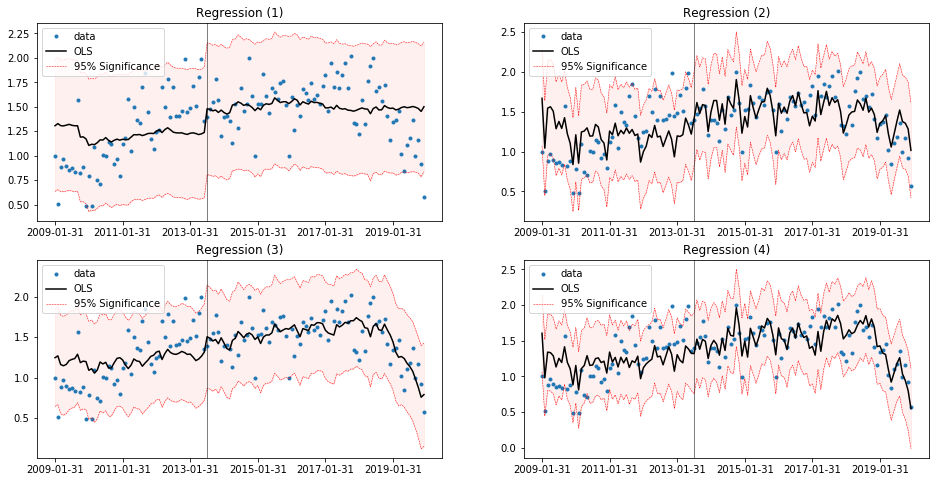

In [11]:
# ploting the fingings
axv1 = 54
axv2 = 105



fig, axs = plt.subplots(2, 2, figsize=(16, 8))
res_list = (results1,results2,results3,results4)
for  ax,j,i in zip(axs.flat, res_list,range(1,7)):
    prstd1, iv_l, iv_u = wls_prediction_std(j)
    ax.set_title('Regression ('+str(i)+')')
    ax.plot(mdf['crimes_corruption'], '.',lw=1)
    ax.plot(j.fittedvalues,'k')
    ax.plot(iv_u, 'r----', lw=0.5)
    ax.plot(iv_l, 'r----', lw=0.5)
    ax.fill_between(mdf.index, iv_u,iv_l, color='red', alpha='0.06')
    
    ax.legend(('data','OLS','95% Significance'),loc=2);
    ax.set_xticks(np.arange(0,133,24))
    ax.axvline(axv1, color='black', lw=1, alpha=0.5)
    #ax.axvline(axv2, color='black', lw=1, alpha=0.5)
    
   
    
    
fig.savefig('dis2.pdf')

In [5]:
#regression discontinuity Results


results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','gdp','unemployment','real_interest']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1','gdp','unemployment','real_interest']]).fit()
results5 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','gdp','unemployment','real_interest','other_crimes']]).fit()
results6 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1','gdp','unemployment','real_interest','other_crimes']]).fit()

stargazer = Stargazer([results1, results2,results3,results4,results5,results6])
stargazer.covariate_order(['mcons','mdummy','mdummy2','mt1','real_interest','gdp','unemployment','other_crimes'])
HTML(stargazer.render_html())

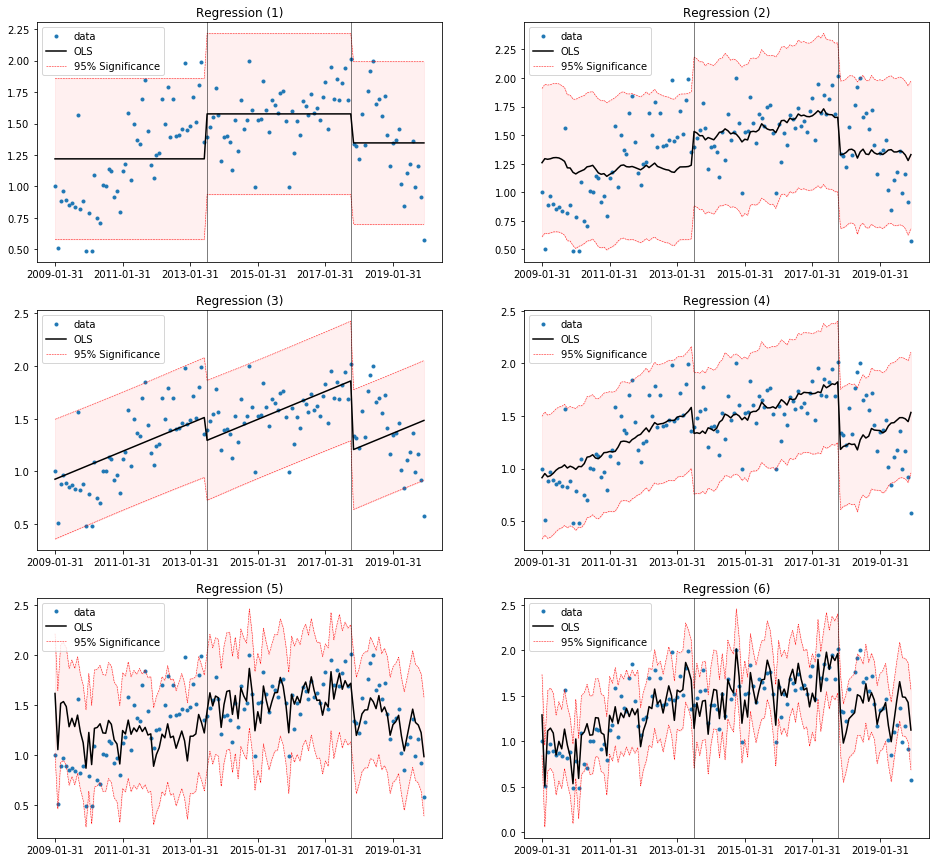

In [11]:
# ploting the fingings
axv1 = 54
axv2 = 105



fig, axs = plt.subplots(3, 2, figsize=(16, 15))
res_list = (results1,results2,results3,results4,results5,results6)
for  ax,j,i in zip(axs.flat, res_list,range(1,7)):
    prstd1, iv_l, iv_u = wls_prediction_std(j)
    ax.set_title('Regression ('+str(i)+')')
    ax.plot(mdf['crimes_corruption'], '.',lw=1)
    ax.plot(j.fittedvalues,'k')
    ax.plot(iv_u, 'r----', lw=0.5)
    ax.plot(iv_l, 'r----', lw=0.5)
    ax.fill_between(mdf.index, iv_u,iv_l, color='red', alpha='0.06')
    ax.axvline(axv1, color='black', lw=1, alpha=0.5)
    ax.legend(('data','OLS','95% Significance'),loc=2);
    ax.set_xticks(np.arange(0,133,24))
    ax.axvline(axv2, color='black', lw=1, alpha=0.5)
    
   
    
    
fig.savefig('dis3.pdf')


In [12]:
#discontinuity using other cimes as regressands
#regression discontinuity Results



results1 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','gdp','unemployment','real_interest','other_crimes']]).fit()
results2 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mt1','gdp','unemployment','real_interest','other_crimes']]).fit()
results3 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','gdp','unemployment','real_interest','other_crimes']]).fit()
results4 = sm.OLS(mdf['crimes_corruption'], mdf[['mcons','mdummy','mdummy2','mt1','gdp','unemployment','real_interest','other_crimes']]).fit()
stargazer = Stargazer([results1, results2,results3,results4])
stargazer.covariate_order(['mcons','mdummy','mt1','mdummy2','real_interest','gdp','unemployment','other_crimes'])
HTML(stargazer.render_html())






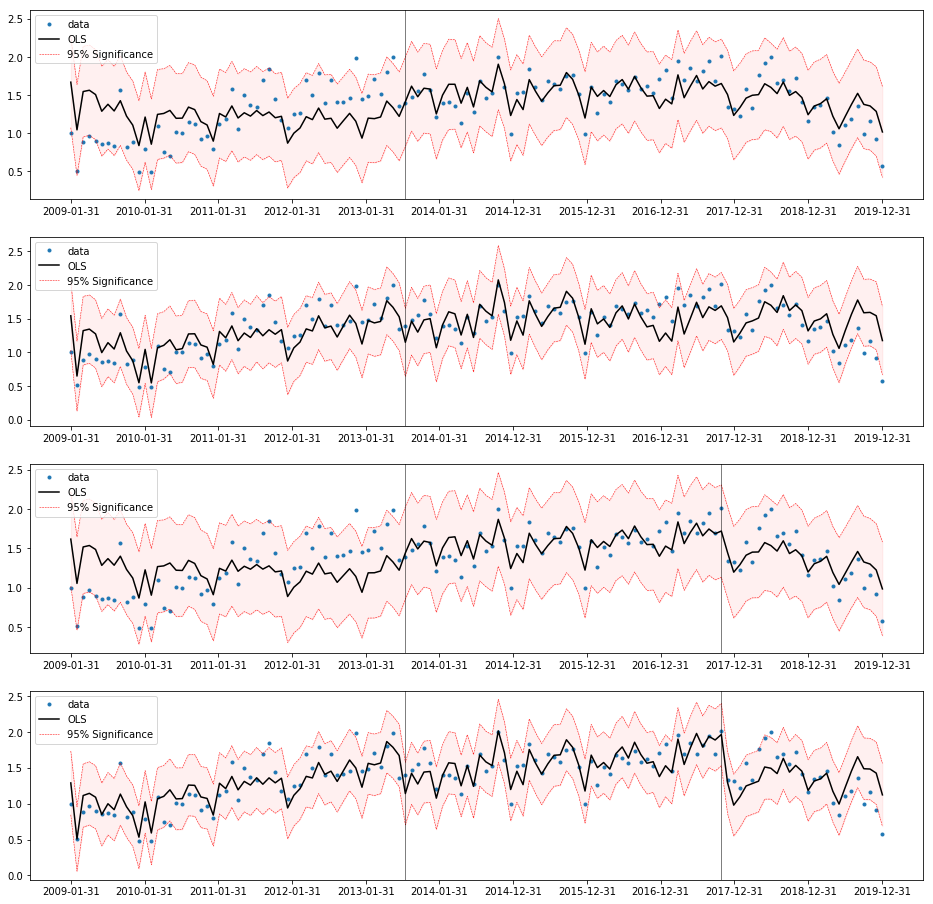

In [13]:
# ploting the fingings

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 16))


res_list = (results1,results2,results3,results4)
for i,j in zip(range(0,8), res_list):
    prstd1, iv_l, iv_u = wls_prediction_std(j)
    ax[i].plot( mdf['crimes_corruption'], '.',lw=1)
    ax[i].plot(j.fittedvalues,'k')
    ax[i].plot( iv_u, 'r----', lw=0.5)
    ax[i].plot( iv_l, 'r----', lw=0.5)
    ax[i].fill_between(mdf.index, iv_u,iv_l, color='red', alpha='0.06')
    ax[i].axvline(axv1, color='black', lw=1, alpha=0.5)
    ax[i].legend(('data','OLS','95% Significance'),loc=2);
    ax[i].set_xticks(np.arange(0,133,11.9))
    if i>1:
        ax[i].axvline(axv2, color='black', lw=1, alpha=0.5)
    else:
        pass
     

#fig.savefig('emp3.pdf')


In [14]:
#creat diff in dff fit:
dnd = []
for i in range(0,len(mdf)):
    if i > 54:
        dnd.append(0)
    else:
        dnd.append(1)
mdf['dnd'] = dnd

In [53]:
#Diff in diff: Preparing the interaction term :
mdf['interaction1'] = mdf['crimes_corruption']*mdf['mdummy']
mdf['interaction2'] = mdf['crimes_corruption']*mdf['mt1']
mdf['interaction3'] = mdf['crimes_corruption']*mdf['mdummy']
mdf['interaction4'] = mdf['crimes_corruption']*mdf['mdummy2']
mdf['interaction5'] = mdf['crimes_corruption']*mdf['mt1']*mdf['mdummy']
mdf['interaction6'] = mdf['crimes_corruption']*mdf['mt1']*mdf['mdummy2']

In [55]:
#Estimating diff in diff

results1b = sm.OLS((mdf['offences']/mdf['offences'][0]) , mdf[['interaction1','mcons','gdp','unemployment','real_interest','crimes_corruption']]).fit()
results2b = sm.OLS((mdf['offences']/mdf['offences'][0]) , mdf[['interaction2','mcons','mt1','gdp','unemployment','real_interest','crimes_corruption']]).fit()
results3b = sm.OLS((mdf['offences']/mdf['offences'][0]) , mdf[['interaction3','interaction4','mcons','gdp','unemployment','real_interest','crimes_corruption']]).fit()
results4b = sm.OLS((mdf['offences']/mdf['offences'][0]) , mdf[['interaction5','interaction6','mcons','mt1','gdp','unemployment','real_interest','crimes_corruption']]).fit()





stargazer = Stargazer([results1b, results2b,results3b, results4b])
stargazer.covariate_order(['mcons','interaction1','interaction2','interaction3','interaction4','interaction5','interaction6','mt1','gdp','unemployment','real_interest','crimes_corruption'])
HTML(stargazer.render_latex())



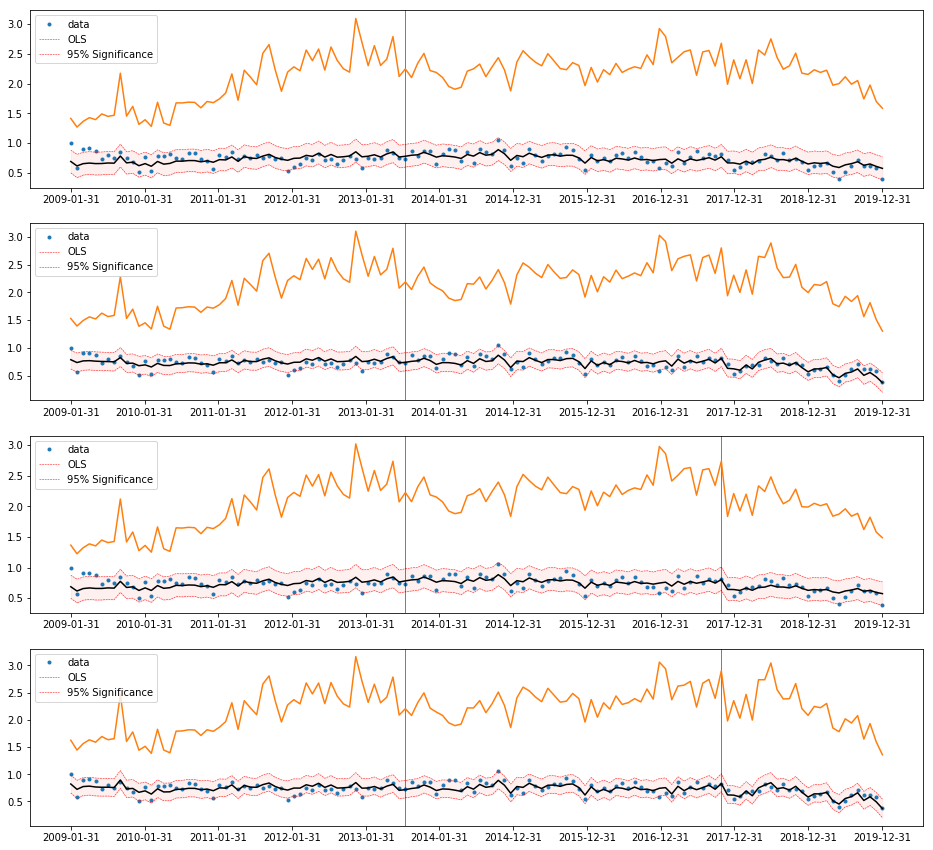

In [36]:
# mult the varables to have the proportion of each group.
mdf['control'] =mdf['other_crimes']/(mdf['offences']/mdf['offences'][0])
mdf['treatment'] =mdf['crimes_corruption']/(mdf['offences']/mdf['offences'][0])

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 15))

res_list = (results1b, results2b,results3b, results4b)
for i,j in zip(range(0,4), res_list):
    prstd1, iv_l, iv_u = wls_prediction_std(j)
    ax[i].plot((mdf['offences']/mdf['offences'][0]), '.',lw=1)
    ax[i].plot( iv_u, 'r----', lw=0.5)
    ax[i].plot( iv_l, 'r----', lw=0.5)
    ax[i].fill_between(mdf.index, iv_u,iv_l, color='red', alpha='0.06')
    ax[i].axvline(axv1, color='black', lw=1, alpha=0.5)
    ax[i].legend(('data','OLS','95% Significance'),loc=2);
    ax[i].set_xticks(np.arange(0,133,11.9))
    if i>1:
        ax[i].axvline(axv2, color='black', lw=1, alpha=0.5)
        ax[i].plot(j.fittedvalues*mdf['treatment']+j.params[0]*mdf['mdummy']*mdf['treatment']+j.params[1]*mdf['mdummy2']*mdf['treatment']+j.params[2])
    else:
        ax[i].plot(j.fittedvalues*mdf['treatment']+j.params[0]*mdf['mdummy']*mdf['treatment']+j.params[1])
    ax[i].plot(j.fittedvalues*mdf['control'],'k')
#fig.savefig('emp3.pdf')zzz


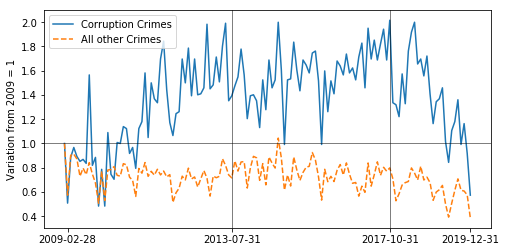

In [47]:
#Parallel pre-treatmen trend assumption
fig, ax = plt.subplots( figsize=(8, 4))

ax.plot( mdf['crimes_corruption'],'-')
ax.plot( mdf['other_crimes'],'--')
ax.axvline(axv1, color='black', lw=1, alpha=0.5)
ax.axvline(axv2, color='black', lw=1, alpha=0.5)
ax.axhline(1, color='black', lw=1, alpha=0.5)
#ax.set_xlim('2009','2020')
ax.set_xticks([1,axv1,axv2,131])
ax.legend(('Corruption Crimes','All other Crimes'),loc=2);
ax.set(ylabel='Variation from 2009 = 1')
#ax[1].plot(crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].plot(df['offences'].resample('M').count() - crimes_corruption['2009':'2019'].resample('M').title.count() )
#ax[1].axvline('2013-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axvline('2018-08-01', color='black', lw=1, alpha=0.5)
#ax[1].axhline(1, color='black', lw=1, alpha=0.5)
fig.savefig('diff.pdf')

In [43]:
mdf.head()

,offences,region,title,mcons,corruption,embezzlement,environmental,desobedience,extortive_corruption,swindle,...,real_interest,dnd,interaction1,interaction2,interaction3,interaction4,interaction5,interaction6,control,treatment
date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,9079,9079,9079,1,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.010230,1,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000
2009-02-28,5204,5204,5204,1,0.638298,0.449275,2.0,0.647059,0.166667,0.670251,...,0.003940,1,0.0,1.016393,0.0,0.0,0.0,0.0,1.001544,0.886610
2009-03-31,8192,8192,8192,1,0.787234,0.956522,2.0,1.264706,1.333333,0.949821,...,0.008832,1,0.0,2.655738,0.0,0.0,0.0,0.0,1.000257,0.981097
2009-04-30,8288,8288,8288,1,0.829787,1.115942,1.0,0.852941,0.500000,1.215054,...,0.008319,1,0.0,3.868852,0.0,0.0,0.0,0.0,0.999189,1.059523
2009-05-31,7924,7924,7924,1,0.936170,0.855072,1.0,0.750000,1.333333,1.075269,...,0.006336,1,0.0,4.467213,0.0,0.0,0.0,0.0,0.999678,1.023671
